In [ ]:
from transformers import AutoTokenizer
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [ ]:
# Load the provided CSV file
extracted_labeled_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/extracted_labeled_reviews.csv')

In [ ]:
extracted_labeled_reviews['review'] = extracted_labeled_reviews['review'].str.replace('\n', ' ').replace('\r', ' ')

In [ ]:
# Tokenize the "review" column
extracted_labeled_reviews['tokenized'] = extracted_labeled_reviews['review'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=False))

Token indices sequence length is longer than the specified maximum sequence length for this model (623 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Calculate tokenized length
extracted_labeled_reviews['tokenized_length'] = extracted_labeled_reviews['tokenized'].apply(len)

In [ ]:
# Filter out rows where tokenized length exceeds 512
filtered_extracted_labeled_reviews = extracted_labeled_reviews[extracted_labeled_reviews['tokenized_length'] <= 512]

In [ ]:
# Calculate the maximum tokenized length for filtered_df
max_length_filtered = filtered_extracted_labeled_reviews['tokenized_length'].max()

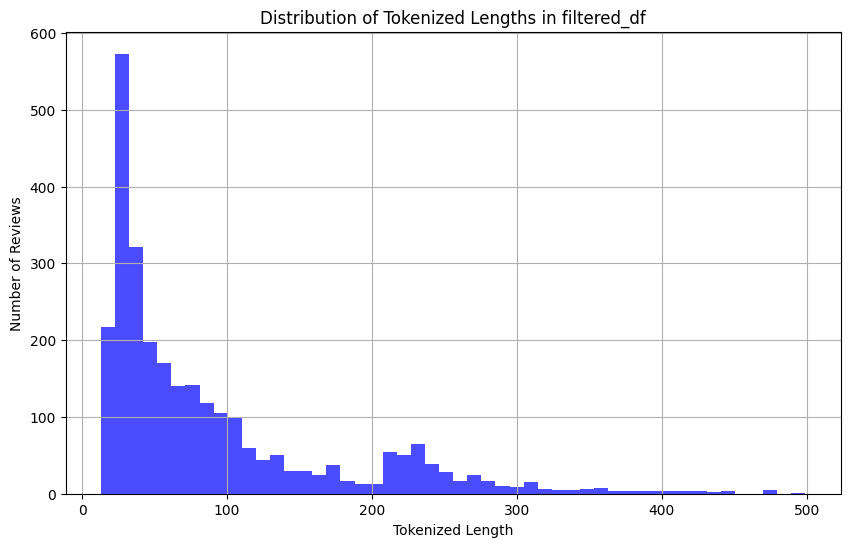

499

In [ ]:
# Plot the histogram for tokenized lengths in filtered_df
plt.figure(figsize=(10, 6))
plt.hist(filtered_extracted_labeled_reviews['tokenized_length'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Tokenized Lengths in filtered_df')
plt.xlabel('Tokenized Length')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

max_length_filtered

In [ ]:
# Calculate the number of rows in the original and filtered dataframes
original_row_count = extracted_labeled_reviews.shape[0]
filtered_row_count = filtered_extracted_labeled_reviews.shape[0]

# Calculate the number of rows removed
removed_rows = original_row_count - filtered_row_count
removed_rows

9

In [ ]:
# Get the number of rows in the filtered dataframe
remaining_rows = filtered_extracted_labeled_reviews.shape[0]
remaining_rows

2791

In [ ]:
label_counts = filtered_extracted_labeled_reviews['label'].value_counts()

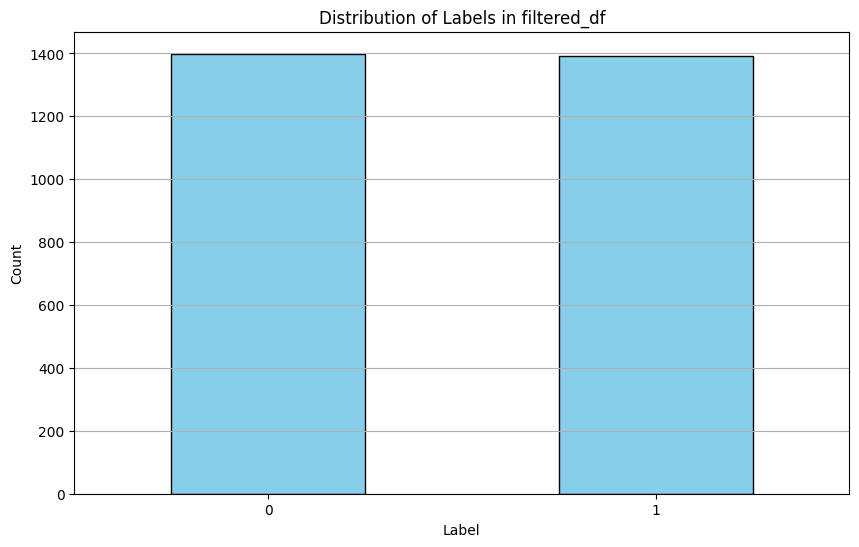

In [ ]:
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Labels in filtered_df')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

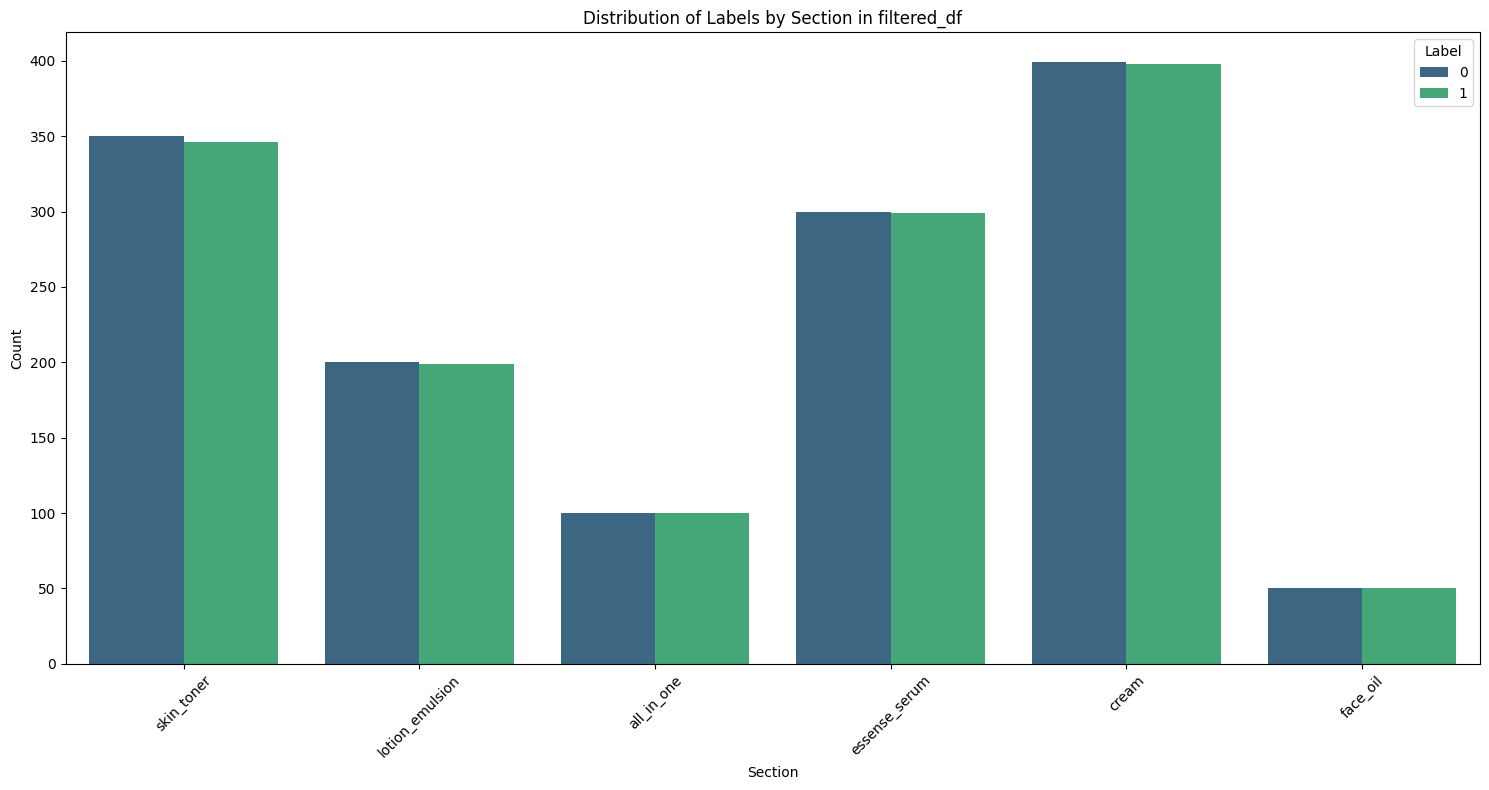

In [ ]:
# Plot the count of each label, divided by section
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_extracted_labeled_reviews, x='section', hue='label', palette="viridis")
plt.title('Distribution of Labels by Section in filtered_df')
plt.xlabel('Section')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()









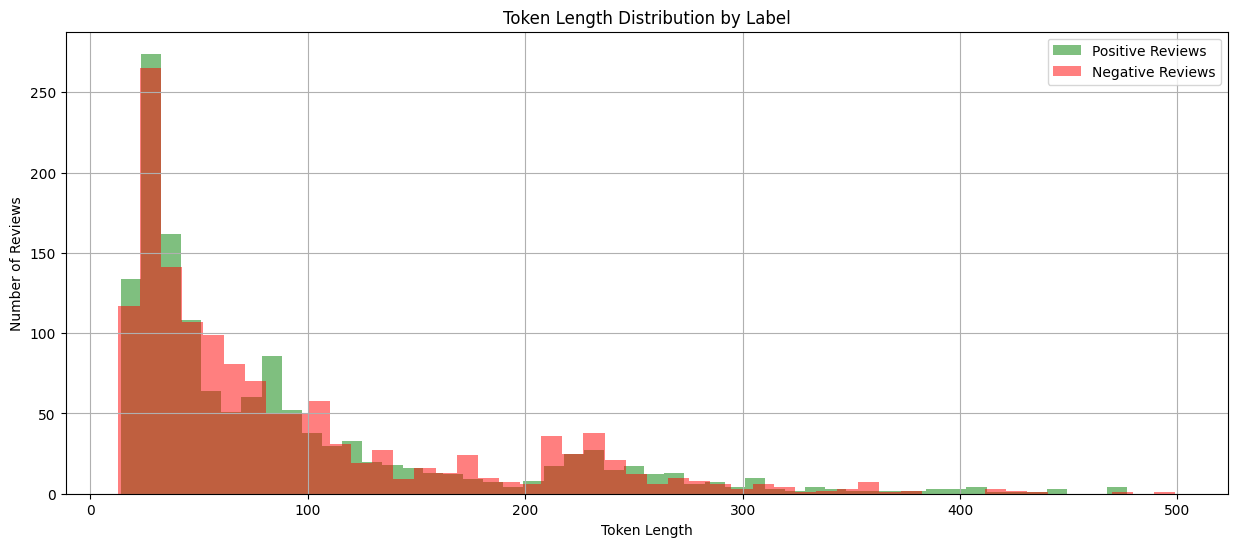

In [ ]:
# Splitting the data based on labels
positive_reviews = filtered_extracted_labeled_reviews[filtered_extracted_labeled_reviews['label'] == 1]['review']
negative_reviews = filtered_extracted_labeled_reviews[filtered_extracted_labeled_reviews['label'] == 0]['review']

# Tokenizing and getting lengths
positive_lengths = positive_reviews.apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True, truncation=False)))
negative_lengths = negative_reviews.apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True, truncation=False)))

# Plotting the distributions
plt.figure(figsize=(15, 6))

# Positive reviews distribution
plt.hist(positive_lengths, bins=50, alpha=0.5, label='Positive Reviews', color='green')

# Negative reviews distribution
plt.hist(negative_lengths, bins=50, alpha=0.5, label='Negative Reviews', color='red')

plt.title('Token Length Distribution by Label')
plt.xlabel('Token Length')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()